Pass 1: Analyzing training data to calculate artifact thresholds...


Calculating thresholds: 100%|██████████| 2400/2400 [04:57<00:00,  8.07it/s]



Calculated Artifact Thresholds:
  - motion_std_thresh: 23.6460
  - max_abs_amp_thresh: 729701.0632
  - eeg_var_upper_thresh: 53810439.3800
  - eeg_var_lower_thresh: -43337528.6983

Pass 2: Filtering 'train' dataset to remove artifacts...


Filtering train: 100%|██████████| 2400/2400 [04:53<00:00,  8.17it/s]


Filtering Complete for train:
  - Original Trials: 2400
  - Clean Trials: 2295
  - Removed Trials: 105 (4.38%)

Pass 2: Filtering 'validation' dataset to remove artifacts...


Filtering validation: 100%|██████████| 50/50 [00:06<00:00,  7.70it/s]


Filtering Complete for validation:
  - Original Trials: 50
  - Clean Trials: 49
  - Removed Trials: 1 (2.00%)

Pass 2: Filtering 'test' dataset to remove artifacts...


Filtering test: 100%|██████████| 50/50 [00:06<00:00,  7.65it/s]


Filtering Complete for test:
  - Original Trials: 50
  - Clean Trials: 50
  - Removed Trials: 0 (0.00%)

RUNNING SINGLE-TRIAL DIAGNOSTIC PLOT


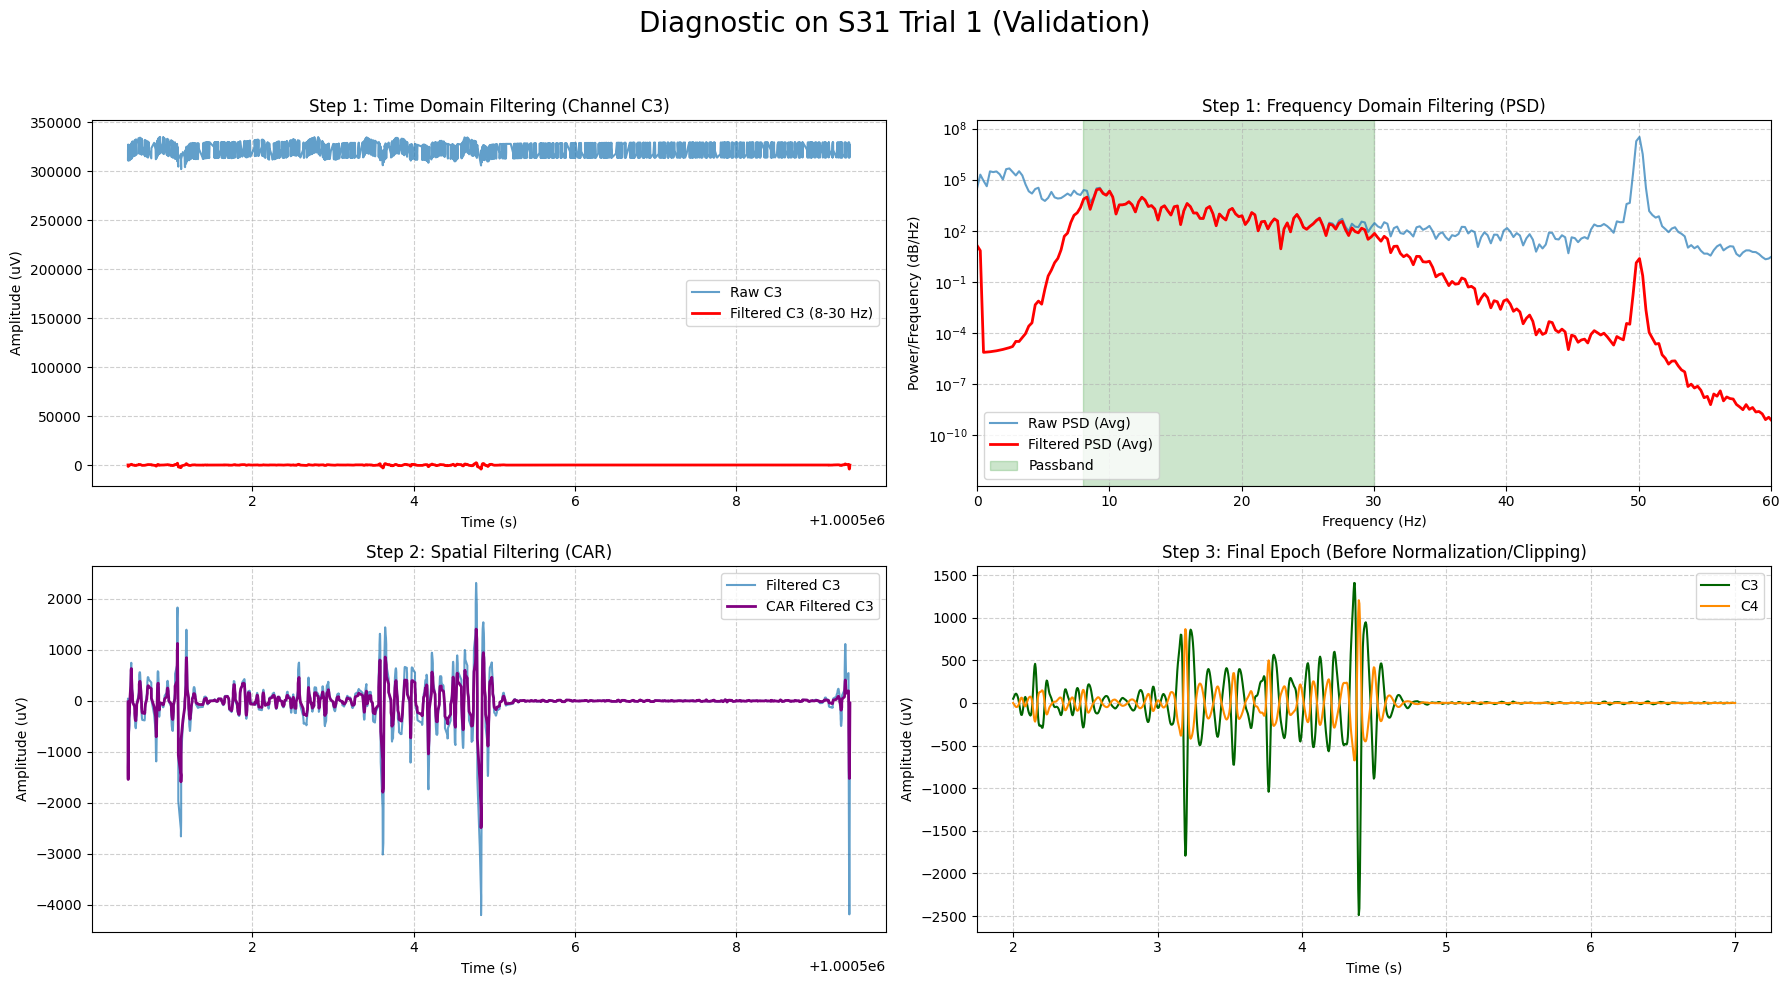


Pass 3: Preprocessing and saving clean 'train' data...


Preprocessing train: 100%|██████████| 238/238 [03:08<00:00,  1.26it/s]



Pass 3: Preprocessing and saving clean 'validation' data...


Preprocessing validation: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]



Pass 3: Preprocessing and saving clean 'test' data...


Preprocessing test: 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]



Saved cleaned trial indexes:
  - /kaggle/working/preprocessed/train_clean.csv
  - /kaggle/working/preprocessed/validation_clean.csv
  - /kaggle/working/preprocessed/test_clean.csv

Copied metadata files to preprocessed directory

Generating final distribution plots for 'TRAIN' dataset...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


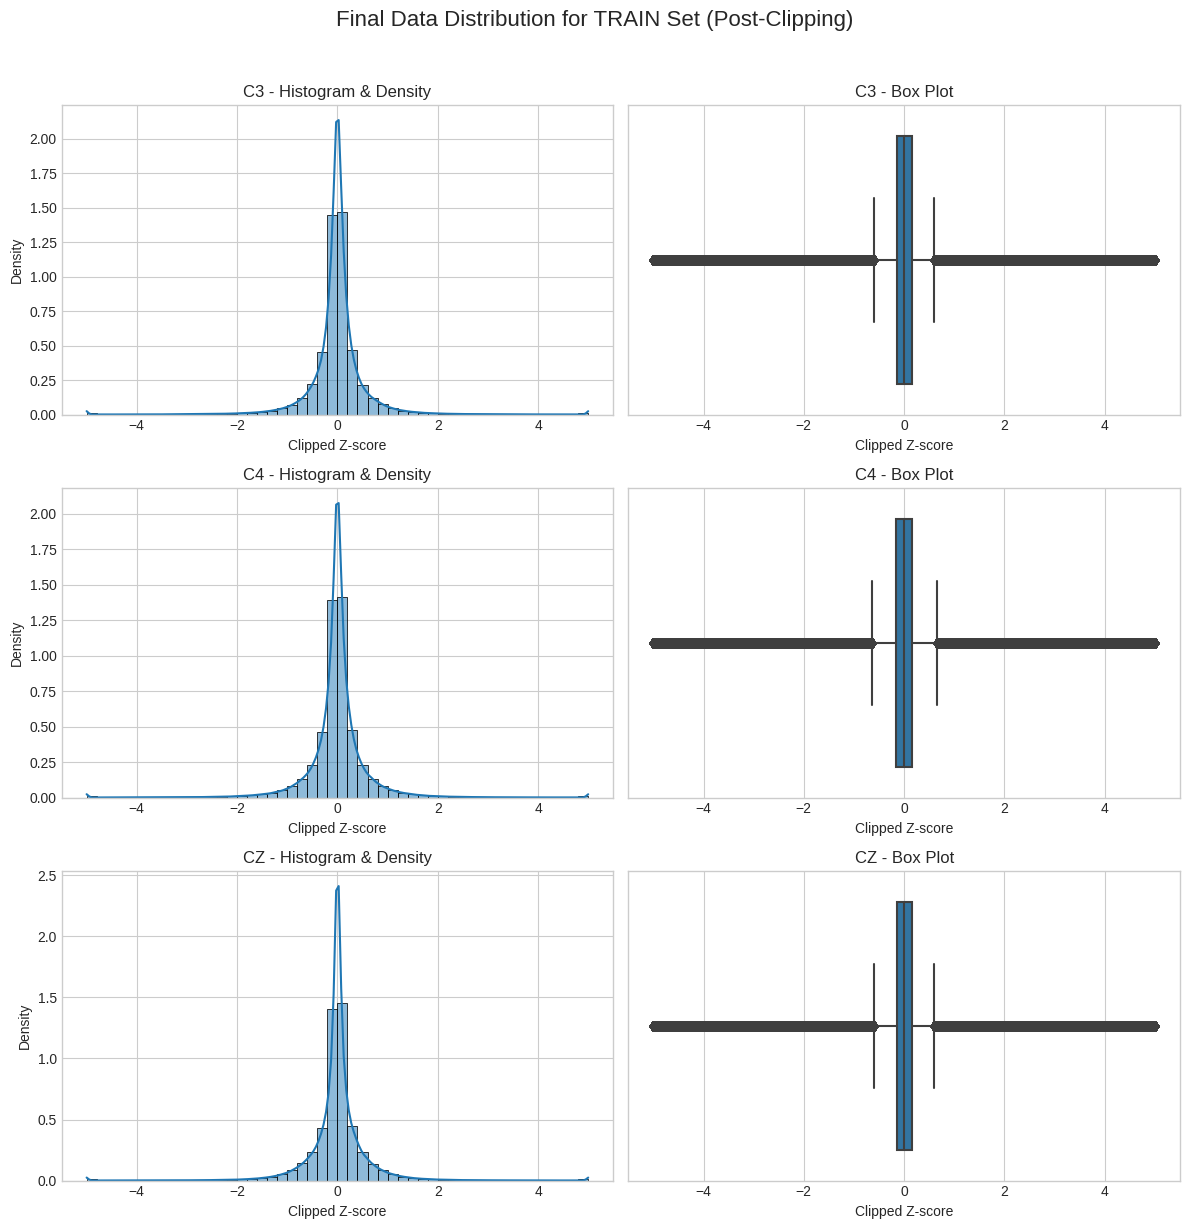


Generating final distribution plots for 'VALIDATION' dataset...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


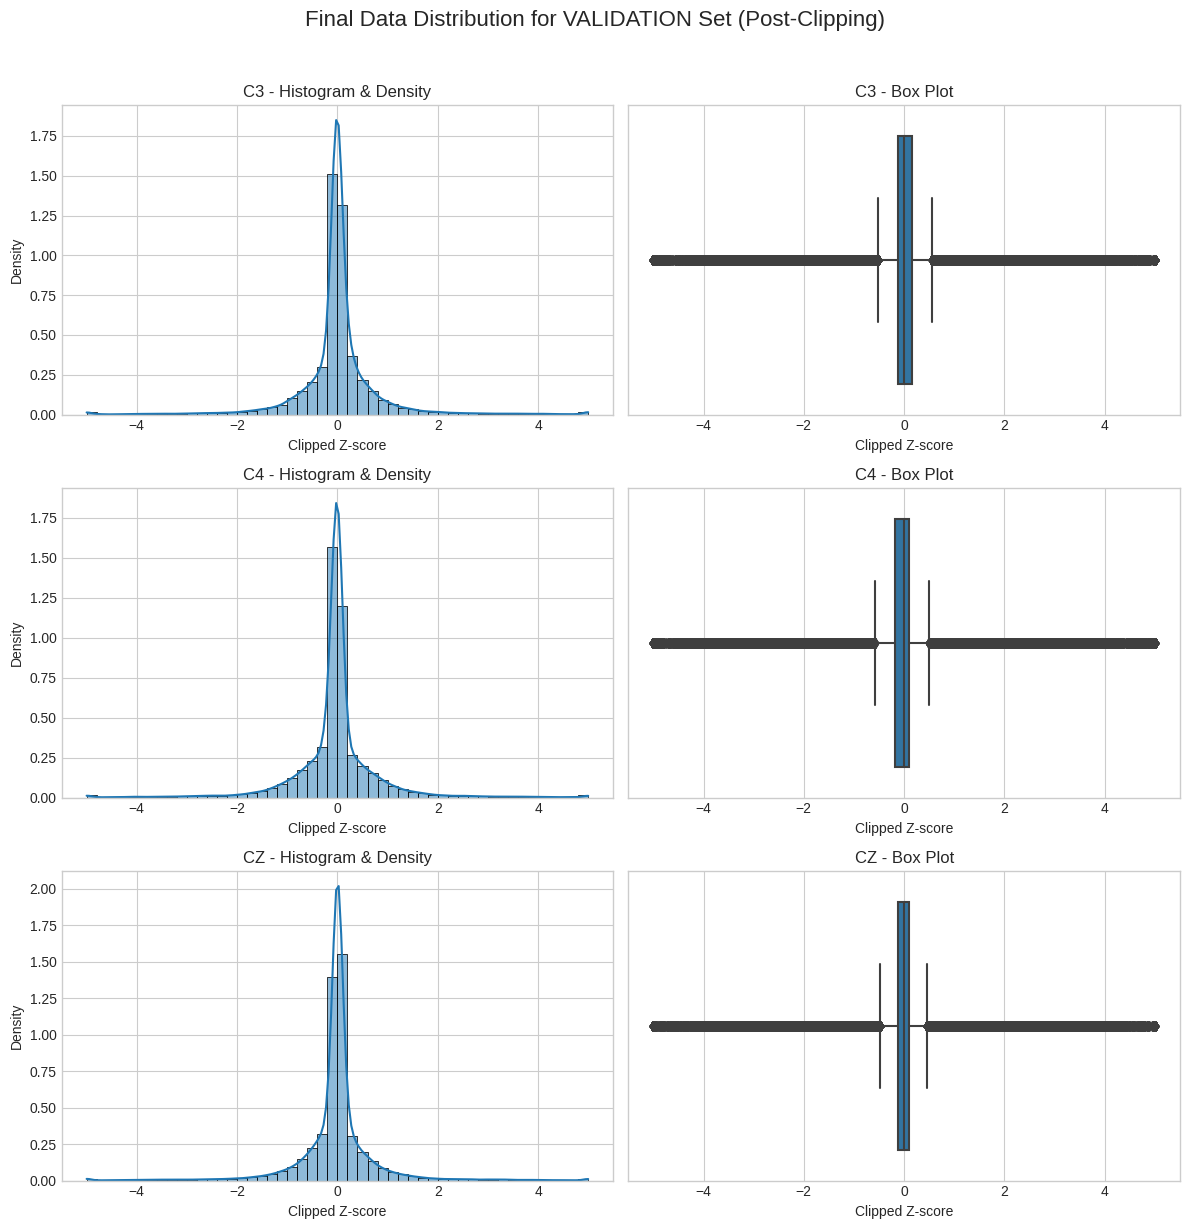


Generating final distribution plots for 'TEST' dataset...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


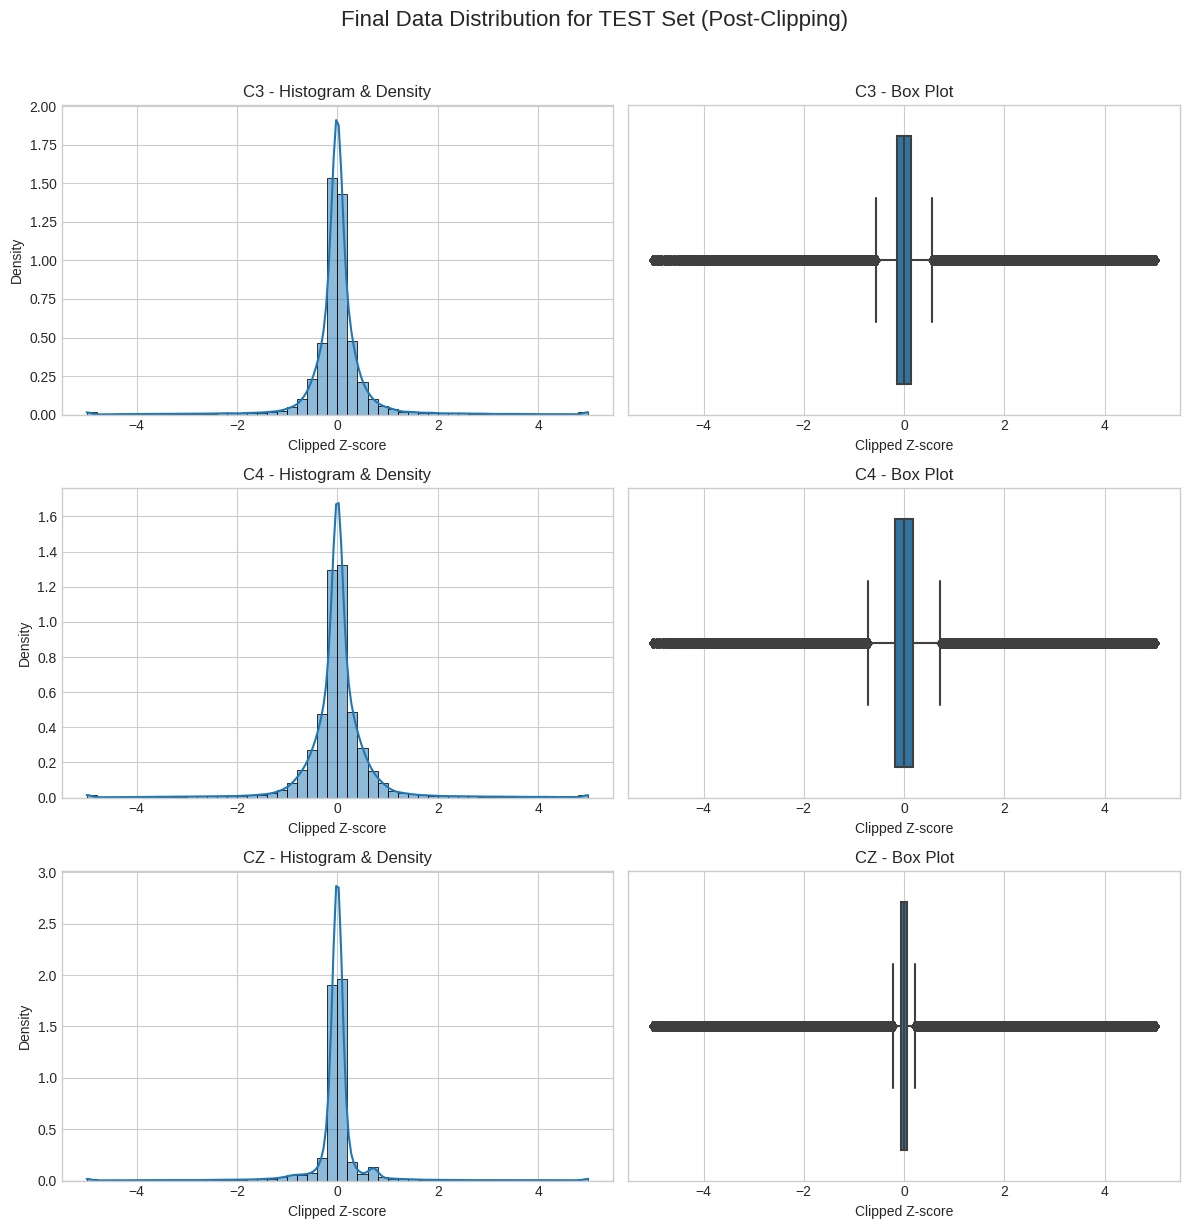


FINAL CHANNEL STATISTICS (POST-CLIPPING)

TRAIN DISTRIBUTION STATISTICS (CLIPPED & FULLY PREPROCESSED):
| Channel   |      Mean |      Std |   Skewness |   Kurtosis |       Min |       25% |   Median |      75% |      Max |
|:----------|----------:|---------:|-----------:|-----------:|----------:|----------:|---------:|---------:|---------:|
| C3        | -0.000610 | 0.649261 |  -0.034516 |  22.465374 | -5.000000 | -0.149772 | 0.001057 | 0.150823 | 5.000000 |
| C4        | -0.000409 | 0.669130 |  -0.041516 |  19.917726 | -5.000000 | -0.160271 | 0.001088 | 0.162329 | 5.000000 |
| CZ        |  0.001445 | 0.663101 |  -0.022286 |  20.959974 | -5.000000 | -0.147411 | 0.001645 | 0.152331 | 5.000000 |

VALIDATION DISTRIBUTION STATISTICS (CLIPPED & FULLY PREPROCESSED):
| Channel   |      Mean |      Std |   Skewness |   Kurtosis |       Min |       25% |    Median |      75% |      Max |
|:----------|----------:|---------:|-----------:|-----------:|----------:|----------:|----------:|--------

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal, stats
from tqdm import tqdm

# ==============================
# CONFIGURATION
# ==============================
# Base path for the dataset on Kaggle
BASE_PATH = "/kaggle/input/mtcaic3"
TASK = "MI"  # Focus on Motor Imagery
PREPROCESSED_BASE_PATH = "/kaggle/working/preprocessed"

# EEG and Motion Sensor channel definitions
EEG_CHANNELS = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
TARGET_CHANNELS = ['C3', 'C4', 'CZ']  # Channels for detailed analysis
MOTION_CHANNELS = ['AccX', 'AccY', 'AccZ', 'Gyro1', 'Gyro2', 'Gyro3']

# Signal properties
SAMPLE_RATE = 250
TRIAL_DURATION = 9  # seconds for MI
SAMPLES_PER_TRIAL = SAMPLE_RATE * TRIAL_DURATION
ARTIFACT_STD_THRESHOLD = 3.0 # Threshold in standard deviations for outlier removal

# Preprocessing parameters
FILTER_LOW_CUT = 8.0    # Hz
FILTER_HIGH_CUT = 30.0  # Hz
FILTER_ORDER = 5
EPOCH_START_S = 2.0   # seconds
EPOCH_END_S = 7.0     # seconds
BASELINE_END_S = 1.0    # seconds
CLIP_MIN = -5.0         # Clip data to a minimum of -5 std devs
CLIP_MAX = 5.0          # Clip data to a maximum of +5 std devs

# ==============================
# DATA LOADING (HELPER)
# ==============================

def save_preprocessed_session(session_path, full_session_df, preprocessed_data, output_base_path):
    """
    Saves preprocessed data in the same structure as original data
    """
    # Construct output path by replacing the base directory
    if "/kaggle/input/mtcaic3/" in session_path:
        output_path = session_path.replace("/kaggle/input/mtcaic3/", f"{output_base_path}/")
    else:
        output_path = os.path.join(output_base_path, os.path.relpath(session_path, "/kaggle/input/mtcaic3"))
    
    # Ensure output directory exists
    output_dir = os.path.dirname(output_path)
    os.makedirs(output_dir, exist_ok=True)
    
    # Create a copy of the session data and update EEG channels
    session_df_preprocessed = full_session_df.copy()
    session_df_preprocessed[EEG_CHANNELS] = preprocessed_data
    
    # Save to CSV
    session_df_preprocessed.to_csv(output_path, index=False)
    return output_path

def load_single_trial(row, dataset_type, base_path):
    """Loads the raw data for a single trial specified by a dataframe row."""
    eeg_path = os.path.join(
        base_path,
        row['task'],
        dataset_type,
        row['subject_id'],
        str(row['trial_session']),
        "EEGdata.csv"
    )
    if not os.path.exists(eeg_path):
        return None

    eeg_data = pd.read_csv(eeg_path).drop_duplicates()
    trial_num = int(row['trial'])
    start_idx = (trial_num - 1) * SAMPLES_PER_TRIAL
    end_idx = start_idx + SAMPLES_PER_TRIAL
    return eeg_data.iloc[start_idx:end_idx]

# ==============================
# ARTIFACT DETECTION & THRESHOLD CALCULATION (PASS 1)
# ==============================

def calculate_artifact_thresholds(df, base_path):
    """
    Analyzes all training trials to compute metrics and determine outlier thresholds.
    """
    print("Pass 1: Analyzing training data to calculate artifact thresholds...")
    metrics = []
    mi_df = df[df['task'] == TASK].copy()

    for _, row in tqdm(mi_df.iterrows(), total=len(mi_df), desc="Calculating thresholds"):
        trial_data = load_single_trial(row, 'train', base_path)
        if trial_data is None or trial_data.empty:
            continue

        motion_std = trial_data[MOTION_CHANNELS].std().sum()
        eeg_data = trial_data[EEG_CHANNELS]
        max_abs_amplitude = eeg_data.abs().max().max()
        eeg_variance = eeg_data.var().mean()

        metrics.append({
            'id': row['id'],
            'motion_std': motion_std,
            'max_abs_amplitude': max_abs_amplitude,
            'eeg_variance': eeg_variance
        })

    metrics_df = pd.DataFrame(metrics)
    thresholds = {
        'motion_std_thresh': metrics_df['motion_std'].mean() + ARTIFACT_STD_THRESHOLD * metrics_df['motion_std'].std(),
        'max_abs_amp_thresh': metrics_df['max_abs_amplitude'].mean() + ARTIFACT_STD_THRESHOLD * metrics_df['max_abs_amplitude'].std(),
        'eeg_var_upper_thresh': metrics_df['eeg_variance'].mean() + ARTIFACT_STD_THRESHOLD * metrics_df['eeg_variance'].std(),
        'eeg_var_lower_thresh': metrics_df['eeg_variance'].mean() - ARTIFACT_STD_THRESHOLD * metrics_df['eeg_variance'].std()
    }

    print("\nCalculated Artifact Thresholds:")
    for key, val in thresholds.items():
        print(f"  - {key}: {val:.4f}")
    return thresholds

# ==============================
# DATA CLEANING (PASS 2)
# ==============================

def get_clean_trial_ids(df, dataset_type, base_path, thresholds):
    """
    Filters trials based on pre-calculated thresholds, returning a clean dataframe.
    """
    print(f"\nPass 2: Filtering '{dataset_type}' dataset to remove artifacts...")
    mi_df = df[df['task'] == TASK].copy()
    clean_ids = []

    for _, row in tqdm(mi_df.iterrows(), total=len(mi_df), desc=f"Filtering {dataset_type}"):
        trial_data = load_single_trial(row, dataset_type, base_path)
        if trial_data is None or trial_data.empty:
            continue

        motion_std = trial_data[MOTION_CHANNELS].std().sum()
        max_abs_amplitude = trial_data[EEG_CHANNELS].abs().max().max()
        eeg_variance = trial_data[EEG_CHANNELS].var().mean()

        if (motion_std < thresholds['motion_std_thresh'] and
            max_abs_amplitude < thresholds['max_abs_amp_thresh'] and
            thresholds['eeg_var_lower_thresh'] < eeg_variance < thresholds['eeg_var_upper_thresh']):
            clean_ids.append(row['id'])

    clean_df = df[df['id'].isin(clean_ids)].copy()
    original_count = len(mi_df)
    clean_count = len(clean_df)
    removed_count = original_count - clean_count
    print(f"Filtering Complete for {dataset_type}:")
    print(f"  - Original Trials: {original_count}")
    print(f"  - Clean Trials: {clean_count}")
    print(f"  - Removed Trials: {removed_count} ({removed_count / original_count:.2%})")
    return clean_df

# ==============================
# EEG PREPROCESSING FUNCTIONS
# ==============================

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    """Applies a bandpass filter to the data."""
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    y = signal.filtfilt(b, a, data, axis=0)
    return y

def common_average_reference(data):
    """Applies Common Average Reference (CAR) to the data."""
    return data - np.mean(data, axis=1, keepdims=True)

# ==============================
# MAIN PREPROCESSING PIPELINE
# ==============================

def load_and_preprocess_data(df, dataset_type, base_path, output_base_path="/kaggle/working/preprocessed"):
    """
    Loads, processes, and saves preprocessed data
    """
    print(f"\nPass 3: Preprocessing and saving clean '{dataset_type}' data...")
    all_epochs_dict = {}
    channel_dist_data = {ch: [] for ch in TARGET_CHANNELS}
    grouped = df.groupby(['subject_id', 'trial_session'])
    
    for (subject, session), group in tqdm(grouped, desc=f"Preprocessing {dataset_type}"):
        session_path = os.path.join(base_path, TASK, dataset_type, subject, str(session), "EEGdata.csv")
        if not os.path.exists(session_path):
            continue
            
        # Load full session data
        full_session_df = pd.read_csv(session_path).drop_duplicates()
        session_eeg_raw = full_session_df[EEG_CHANNELS].values
        
        # Preprocess entire session at once
        session_eeg_filtered = bandpass_filter(session_eeg_raw, FILTER_LOW_CUT, FILTER_HIGH_CUT, SAMPLE_RATE)
        session_eeg_referenced = common_average_reference(session_eeg_filtered)
        session_means = session_eeg_referenced.mean(axis=0)
        session_stds = session_eeg_referenced.std(axis=0)
        
        # Prepare container for preprocessed session data
        session_preprocessed = np.zeros_like(session_eeg_raw)
        
        for _, row in group.iterrows():
            trial_num = int(row['trial'])
            start_idx = (trial_num - 1) * SAMPLES_PER_TRIAL
            end_idx = start_idx + SAMPLES_PER_TRIAL
            trial_data = session_eeg_referenced[start_idx:end_idx]

            # Baseline correction
            baseline_samples = int(BASELINE_END_S * SAMPLE_RATE)
            baseline_mean = trial_data[:baseline_samples].mean(axis=0)
            trial_corrected = trial_data - baseline_mean

            # Normalization and clipping
            trial_normalized = (trial_corrected - session_means) / (session_stds + 1e-8)
            trial_clipped = np.clip(trial_normalized, CLIP_MIN, CLIP_MAX)
            
            # Store processed trial
            session_preprocessed[start_idx:end_idx] = trial_clipped
            
            # Extract epoch for model training
            epoch_start_sample = int(EPOCH_START_S * SAMPLE_RATE)
            epoch_end_sample = int(EPOCH_END_S * SAMPLE_RATE)
            epoch = trial_clipped[epoch_start_sample:epoch_end_sample]
            all_epochs_dict[row['id']] = epoch
            
            # Collect distribution data
            for channel in TARGET_CHANNELS:
                chan_idx = EEG_CHANNELS.index(channel)
                channel_dist_data[channel].extend(epoch[:, chan_idx].flatten())
        
        # Save entire preprocessed session
        save_path = save_preprocessed_session(
            session_path, 
            full_session_df, 
            session_preprocessed, 
            output_base_path
        )
        #print(f"Saved preprocessed session: {save_path}")
                
    return channel_dist_data, all_epochs_dict
# ==============================
# DIAGNOSTICS & VISUALIZATION
# ==============================

def run_diagnostic_plot(df, dataset_type, base_path):
    """Runs a full diagnostic plot on a single sample trial."""
    print("\n" + "="*60)
    print("RUNNING SINGLE-TRIAL DIAGNOSTIC PLOT")
    print("="*60)

    if df.empty:
        print(f"No clean trials available in '{dataset_type}' for diagnostics. Skipping.")
        return

    sample_row = df.iloc[0]
    trial_data = load_single_trial(sample_row, dataset_type, base_path)
    if trial_data is None: return
        
    eeg_raw = trial_data[EEG_CHANNELS].values
    time_vector = trial_data['Time'].values

    eeg_filtered = bandpass_filter(eeg_raw, FILTER_LOW_CUT, FILTER_HIGH_CUT, SAMPLE_RATE)
    freqs_raw, psd_raw = signal.welch(eeg_raw, SAMPLE_RATE, nperseg=1024, axis=0)
    freqs_filt, psd_filt = signal.welch(eeg_filtered, SAMPLE_RATE, nperseg=1024, axis=0)

    plt.figure(figsize=(18, 10))
    plt.suptitle(f"Diagnostic on {sample_row['subject_id']} Trial {sample_row['trial']} ({dataset_type.capitalize()})", fontsize=20, y=0.98)
    
    ax1 = plt.subplot(2, 2, 1)
    ax1.plot(time_vector, eeg_raw[:, 1], label='Raw C3', alpha=0.7)
    ax1.plot(time_vector, eeg_filtered[:, 1], label='Filtered C3 (8-30 Hz)', color='red', linewidth=2)
    ax1.set_title('Step 1: Time Domain Filtering (Channel C3)'); ax1.set_xlabel('Time (s)'); ax1.set_ylabel('Amplitude (uV)'); ax1.legend(); ax1.grid(True, linestyle='--', alpha=0.6)

    ax2 = plt.subplot(2, 2, 2)
    ax2.semilogy(freqs_raw, psd_raw.mean(axis=1), label='Raw PSD (Avg)', alpha=0.7)
    ax2.semilogy(freqs_filt, psd_filt.mean(axis=1), label='Filtered PSD (Avg)', color='red', linewidth=2)
    ax2.axvspan(FILTER_LOW_CUT, FILTER_HIGH_CUT, color='green', alpha=0.2, label='Passband')
    ax2.set_title('Step 1: Frequency Domain Filtering (PSD)'); ax2.set_xlabel('Frequency (Hz)'); ax2.set_ylabel('Power/Frequency (dB/Hz)'); ax2.set_xlim(0, 60); ax2.legend(); ax2.grid(True, linestyle='--', alpha=0.6)

    eeg_referenced = common_average_reference(eeg_filtered)
    ax3 = plt.subplot(2, 2, 3)
    ax3.plot(time_vector, eeg_filtered[:, 1], label='Filtered C3', alpha=0.7)
    ax3.plot(time_vector, eeg_referenced[:, 1], label='CAR Filtered C3', color='purple', linewidth=2)
    ax3.set_title('Step 2: Spatial Filtering (CAR)'); ax3.set_xlabel('Time (s)'); ax3.set_ylabel('Amplitude (uV)'); ax3.legend(); ax3.grid(True, linestyle='--', alpha=0.6)

    epoch_start_sample = int(EPOCH_START_S * SAMPLE_RATE)
    epoch_end_sample = int(EPOCH_END_S * SAMPLE_RATE)
    epoch_time_vector = np.linspace(EPOCH_START_S, EPOCH_END_S, epoch_end_sample - epoch_start_sample)
    epoch = eeg_referenced[epoch_start_sample:epoch_end_sample]
    ax4 = plt.subplot(2, 2, 4)
    ax4.plot(epoch_time_vector, epoch[:, 1], color='darkgreen', label='C3')
    ax4.plot(epoch_time_vector, epoch[:, 3], color='darkorange', label='C4')
    ax4.set_title('Step 3: Final Epoch (Before Normalization/Clipping)'); ax4.set_xlabel('Time (s)'); ax4.set_ylabel('Amplitude (uV)'); ax4.legend(); ax4.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()


def create_final_distribution_plots(data, dataset_name):
    """Generates histogram, density, and box plots for the final processed data."""
    if not any(data.values()):
        print(f"No data to plot for {dataset_name.upper()} dataset.")
        return

    print(f"\nGenerating final distribution plots for '{dataset_name.upper()}' dataset...")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(len(TARGET_CHANNELS), 2, figsize=(12, 4 * len(TARGET_CHANNELS)))
    fig.suptitle(f'Final Data Distribution for {dataset_name.upper()} Set (Post-Clipping)', fontsize=16, y=1.02)

    for i, channel in enumerate(TARGET_CHANNELS):
        channel_data = data[channel]
        if not channel_data: continue

        # Histogram and Density Plot
        sns.histplot(channel_data, kde=True, ax=axes[i, 0], bins=50, stat="density")
        axes[i, 0].set_title(f'{channel} - Histogram & Density')
        axes[i, 0].set_xlabel('Clipped Z-score')
        axes[i, 0].set_ylabel('Density')

        # Box Plot
        sns.boxplot(x=channel_data, ax=axes[i, 1])
        axes[i, 1].set_title(f'{channel} - Box Plot')
        axes[i, 1].set_xlabel('Clipped Z-score')

    plt.tight_layout()
    plt.show()


def print_distribution_stats(data, name):
    """Prints detailed distribution statistics for a given dataset."""
    if not any(data.values()):
        print(f"\nNo data to display for {name.upper()} statistics.")
        return
        
    print(f"\n{name.upper()} DISTRIBUTION STATISTICS (CLIPPED & FULLY PREPROCESSED):")
    stats_data = []
    for channel in TARGET_CHANNELS:
        if not data[channel]: continue
        d = np.array(data[channel])
        stats_data.append({
            'Channel': channel, 'Mean': np.mean(d), 'Std': np.std(d),
            'Skewness': stats.skew(d), 'Kurtosis': stats.kurtosis(d),
            'Min': np.min(d), '25%': np.percentile(d, 25),
            'Median': np.median(d), '75%': np.percentile(d, 75), 'Max': np.max(d)
        })
    
    if stats_data:
        stats_df = pd.DataFrame(stats_data)
        print(stats_df.to_markdown(index=False, floatfmt=".6f"))

# ==============================
# MAIN EXECUTION
# ==============================

if __name__ == "__main__":
    # Load data indices
    BASE_PATH = "/kaggle/input/mtcaic3"
    OUTPUT_BASE = "/kaggle/working/preprocessed"
    
    train_df_full = pd.read_csv(os.path.join(BASE_PATH, 'train.csv'))
    validation_df_full = pd.read_csv(os.path.join(BASE_PATH, 'validation.csv'))
    test_df_full = pd.read_csv(os.path.join(BASE_PATH, 'test.csv'))

    # --- Pass 1 & 2: Artifact Detection and Rejection ---
    artifact_thresholds = calculate_artifact_thresholds(train_df_full, BASE_PATH)
    train_df_clean = get_clean_trial_ids(train_df_full, 'train', BASE_PATH, artifact_thresholds)
    validation_df_clean = get_clean_trial_ids(validation_df_full, 'validation', BASE_PATH, artifact_thresholds)
    test_df_clean = get_clean_trial_ids(test_df_full, 'test', BASE_PATH, artifact_thresholds)

    # --- Run Single-Trial Diagnostic Plot ---
    run_diagnostic_plot(validation_df_clean, 'validation', BASE_PATH)

    # --- Pass 3: Full Preprocessing on Clean Data ---
    # Create output directory structure
    os.makedirs(OUTPUT_BASE, exist_ok=True)
    
    train_stats, train_epochs = load_and_preprocess_data(train_df_clean, 'train', BASE_PATH, OUTPUT_BASE)
    val_stats, val_epochs = load_and_preprocess_data(validation_df_clean, 'validation', BASE_PATH, OUTPUT_BASE)
    test_stats, test_epochs = load_and_preprocess_data(test_df_clean, 'test', BASE_PATH, OUTPUT_BASE)

    # --- Save cleaned trial indexes ---
    train_df_clean.to_csv(os.path.join(OUTPUT_BASE, 'train_clean.csv'), index=False)
    validation_df_clean.to_csv(os.path.join(OUTPUT_BASE, 'validation_clean.csv'), index=False)
    test_df_clean.to_csv(os.path.join(OUTPUT_BASE, 'test_clean.csv'), index=False)
    print("\nSaved cleaned trial indexes:")
    print(f"  - {os.path.join(OUTPUT_BASE, 'train_clean.csv')}")
    print(f"  - {os.path.join(OUTPUT_BASE, 'validation_clean.csv')}")
    print(f"  - {os.path.join(OUTPUT_BASE, 'test_clean.csv')}")

    # --- Copy original metadata files ---
    for file in ['train.csv', 'validation.csv', 'test.csv', 'sample_submission.csv']:
        src = os.path.join(BASE_PATH, file)
        dst = os.path.join(OUTPUT_BASE, file)
        shutil.copy2(src, dst)
    print("\nCopied metadata files to preprocessed directory")

    # --- Generate Final Distribution Plots for All Datasets ---
    create_final_distribution_plots(train_stats, "Train")
    create_final_distribution_plots(val_stats, "Validation")
    create_final_distribution_plots(test_stats, "Test")

    # --- Print Final Statistics on Fully Processed Data ---
    print("\n" + "="*60)
    print("FINAL CHANNEL STATISTICS (POST-CLIPPING)")
    print("="*60)
    print_distribution_stats(train_stats, "Train")
    print_distribution_stats(val_stats, "Validation")
    print_distribution_stats(test_stats, "Test")
    
    # --- Example of accessing final data for a model ---
    if train_epochs:
        first_train_id = list(train_epochs.keys())[0]
        sample_epoch_data = train_epochs[first_train_id]
        print(f"\nSample of final data for training (ID: {first_train_id}):")
        print(f"  - Shape: {sample_epoch_data.shape}")
        print(f"  - This is a NumPy array ready for a machine learning model.")
    
    print("\nPreprocessing complete! Preprocessed data saved to:")
    print(f"  {OUTPUT_BASE}")

In [6]:
#!pip install pyriemann

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report  # Added for classification reports
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from scipy import signal
import pywt

# ==============================
# CONFIGURATION
# ==============================
PREPROCESSED_BASE_PATH = "/kaggle/working/preprocessed"
TASK = "MI"
EEG_CHANNELS = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
SAMPLE_RATE = 250
EPOCH_DURATION = 5.0  # 2-7s epoch
SAMPLES_PER_TRIAL = int(SAMPLE_RATE * EPOCH_DURATION)  # 1250 samples

# STFT Parameters
STFT_NPERSEG = 64
STFT_NOVERLAP = 32

# CWT Parameters
CWT_SCALES = np.arange(1, 51)
CWT_WAVELET = 'morl'

# Model Parameters
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001

# ==============================
# DATA LOADING FUNCTIONS
# ==============================

def load_preprocessed_trial(row, dataset_type, base_path):
    """Loads preprocessed EEG data for a single trial"""
    eeg_path = os.path.join(
        base_path,
        TASK,
        dataset_type,
        row['subject_id'],
        str(row['trial_session']),
        "EEGdata.csv"
    )
    if not os.path.exists(eeg_path):
        return None
    
    # Load entire session data
    session_data = pd.read_csv(eeg_path)
    
    # Calculate start index for the trial
    trial_num = int(row['trial'])
    start_idx = (trial_num - 1) * SAMPLES_PER_TRIAL
    end_idx = start_idx + SAMPLES_PER_TRIAL
    
    # Extract trial data and return as numpy array
    trial_data = session_data[EEG_CHANNELS].iloc[start_idx:end_idx].values
    return trial_data

def load_dataset(df, dataset_type):
    """Loads and returns preprocessed data and labels"""
    X = []
    y = []
    
    for _, row in df.iterrows():
        trial_data = load_preprocessed_trial(row, dataset_type, PREPROCESSED_BASE_PATH)
        if trial_data is not None:
            X.append(trial_data)
            # Convert labels to numerical values
            if row['label'] == 'Left':
                y.append(0)
            else:  # 'Right'
                y.append(1)
    
    return np.array(X), np.array(y)

# ==============================
# FEATURE EXTRACTION FUNCTIONS
# ==============================

def compute_stft(eeg_data):
    """Compute STFT for EEG data"""
    stft_features = []
    for channel in range(eeg_data.shape[1]):
        f, t, Zxx = signal.stft(
            eeg_data[:, channel],
            fs=SAMPLE_RATE,
            nperseg=STFT_NPERSEG,
            noverlap=STFT_NOVERLAP
        )
        # Take magnitude and transpose to (time, freq)
        stft_features.append(np.abs(Zxx).T)
    
    # Stack channels and add channel dimension
    return np.stack(stft_features, axis=-1)

def compute_cwt(eeg_data):
    """Compute Continuous Wavelet Transform for EEG data"""
    cwt_features = []
    for channel in range(eeg_data.shape[1]):
        coeffs, _ = pywt.cwt(eeg_data[:, channel], CWT_SCALES, CWT_WAVELET)
        # Take magnitude and transpose to (time, scale)
        cwt_features.append(np.abs(coeffs).T)
    
    # Stack channels and add channel dimension
    return np.stack(cwt_features, axis=-1)

def compute_csp_features(eeg_data):
    """Compute Common Spatial Patterns features"""
    # Placeholder implementation - real CSP requires solving generalized eigenvalue problem
    # For now, we'll compute bandpower as a simple spatial feature
    bandpower = []
    for channel in range(eeg_data.shape[1]):
        psd = np.abs(np.fft.rfft(eeg_data[:, channel]))**2
        freqs = np.fft.rfftfreq(len(eeg_data[:, channel]), 1/SAMPLE_RATE)
        mu_mask = (freqs >= 8) & (freqs <= 13)
        beta_mask = (freqs >= 13) & (freqs <= 30)
        mu_power = np.mean(psd[mu_mask])
        beta_power = np.mean(psd[beta_mask])
        bandpower.append(mu_power)
        bandpower.append(beta_power)
    
    return np.array(bandpower)

# ==============================
# MODEL ARCHITECTURES
# ==============================

def create_stft_cnn_model(input_shape):
    """Model 1: STFT Input with CNN Architecture (Fixed)"""
    model = Sequential([
        # Conv Block 1 (with padding)
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        
        # Conv Block 2 (with padding)
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        
        # Conv Block 3 (with padding)
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        
        # Conv Block 4 (with padding)
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        
        # Conv Block 5 (with padding)
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        
        # Use Global Pooling instead of Flatten
        GlobalAveragePooling2D(),
        
        # Fully Connected Layers
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


def create_csp_cnn_model(input_shape):
    """Model 2: CSP Features with CNN Architecture (Fixed)"""
    model = Sequential([
        # Conv Block 1 (with padding)
        Conv2D(32, (3, 3), activation='elu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2), padding='same'),
        
        # Conv Block 2 (with padding)
        Conv2D(64, (3, 3), activation='elu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        
        # Conv Block 3 (with padding)
        Conv2D(128, (3, 3), activation='elu', padding='same'),
        
        # Conv Block 4 (with padding)
        Conv2D(128, (3, 3), activation='elu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        
        # Conv Block 5 (with padding)
        Conv2D(256, (3, 3), activation='elu', padding='same'),
        
        # Conv Block 6 (with padding)
        Conv2D(256, (3, 3), activation='elu', padding='same'),
        
        # Use Global Pooling instead of Flatten
        GlobalAveragePooling2D(),
        
        # Fully Connected Layers
        Dense(1024, activation='elu'),
        Dropout(0.5),
        Dense(256, activation='elu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_riemann_svm_model():
    """Model 3: Riemannian Geometry + SVM"""
    # FIX: Added regularization to covariance matrices
    riemann_pipeline = make_pipeline(
        Covariances(estimator='oas'),  # More robust covariance estimator
        TangentSpace(),
        StandardScaler(),
        SVC(kernel='rbf', C=1.0, probability=True)
    )
    return riemann_pipeline

# ==============================
# MAIN TRAINING SCRIPT
# ==============================

def main():
    # Load preprocessed datasets
    train_df = pd.read_csv(os.path.join(PREPROCESSED_BASE_PATH, 'train_clean.csv'))
    val_df = pd.read_csv(os.path.join(PREPROCESSED_BASE_PATH, 'validation_clean.csv'))
    
    # Load data
    X_train, y_train = load_dataset(train_df, 'train')
    X_val, y_val = load_dataset(val_df, 'validation')
    
    print(f"Training data shape: {X_train.shape}")
    print(f"Validation data shape: {X_val.shape}")
    
    # Model 1: STFT + CNN
    print("\n" + "="*50)
    print("TRAINING MODEL 1: STFT + CNN")
    print("="*50)
    
    # Compute STFT features
    X_train_stft = np.array([compute_stft(trial) for trial in X_train])
    X_val_stft = np.array([compute_stft(trial) for trial in X_val])
    
    # Get input shape (time, freq, channels)
    input_shape = X_train_stft[0].shape
    
    # Create and train model
    model1 = create_stft_cnn_model(input_shape)
    model1.summary()
    
    history1 = model1.fit(
        X_train_stft, y_train,
        validation_data=(X_val_stft, y_val),
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        verbose=1
    )
    
    # Save model
    model1.save(os.path.join(PREPROCESSED_BASE_PATH, 'model1_stft_cnn.h5'))
    
    # Generate predictions and classification report
    y_pred1 = model1.predict(X_val_stft)
    y_pred1_classes = np.argmax(y_pred1, axis=1)
    
    print("\nSTFT+CNN Classification Report:")
    print(classification_report(y_val, y_pred1_classes, target_names=['Left', 'Right']))
    
    # Model 2: CSP + CNN
    print("\n" + "="*50)
    print("TRAINING MODEL 2: CSP + CNN")
    print("="*50)
    
    # Compute CSP features
    X_train_csp = np.array([compute_csp_features(trial) for trial in X_train])
    X_val_csp = np.array([compute_csp_features(trial) for trial in X_val])
    
    # Reshape for CNN (add dummy dimensions for 2D conv)
    X_train_csp = X_train_csp.reshape(X_train_csp.shape[0], 8, 2, 1)  # 8 channels x 2 features
    X_val_csp = X_val_csp.reshape(X_val_csp.shape[0], 8, 2, 1)
    
    # Create and train model
    model2 = create_csp_cnn_model((8, 2, 1))
    model2.summary()
    
    history2 = model2.fit(
        X_train_csp, y_train,
        validation_data=(X_val_csp, y_val),
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        verbose=1
    )
    
    # Save model
    model2.save(os.path.join(PREPROCESSED_BASE_PATH, 'model2_csp_cnn.h5'))
    
    # Generate predictions and classification report
    y_pred2 = model2.predict(X_val_csp)
    y_pred2_classes = np.argmax(y_pred2, axis=1)
    
    print("\nCSP+CNN Classification Report:")
    print(classification_report(y_val, y_pred2_classes, target_names=['Left', 'Right']))
    
    # Model 3: Riemannian + SVM
    print("\n" + "="*50)
    print("TRAINING MODEL 3: RIEMANNIAN + SVM")
    print("="*50)
    
    # Prepare data for Riemannian geometry
    # Reshape to (n_trials, n_channels, n_samples)
    X_train_ts = X_train.transpose(0, 2, 1)
    X_val_ts = X_val.transpose(0, 2, 1)
    
    # Create and train model
    model3 = create_riemann_svm_model()
    model3.fit(X_train_ts, y_train)
    
    # Evaluate
    val_accuracy = model3.score(X_val_ts, y_val)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    
    # Generate predictions and classification report
    y_pred3 = model3.predict(X_val_ts)
    
    print("\nRiemannian SVM Classification Report:")
    print(classification_report(y_val, y_pred3, target_names=['Left', 'Right']))
    
    # Save model (using joblib)
    from joblib import dump
    dump(model3, os.path.join(PREPROCESSED_BASE_PATH, 'model3_riemann_svm.joblib'))

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'pyriemann'

In [10]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import signal
from sklearn.metrics import f1_score, classification_report
from mne.decoding import CSP
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, LearningRateScheduler
import shutil

# ==============================
# CONFIGURATION
# ==============================
BASE_PREPROCESSED = "/kaggle/working/preprocessed"
OUTPUT_DIR = "./models3"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# EEG channels and selection
EEG_CHANNELS = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']
SELECTED_CHANNELS = ['C3', 'CZ', 'C4', 'PZ']  # Channels used for training
CHANNEL_INDICES = [EEG_CHANNELS.index(ch) for ch in SELECTED_CHANNELS]  # [1,2,3,4]

# Epoch parameters
SAMPLE_RATE = 250
EPOCH_START_S = 2.0
EPOCH_END_S = 7.0
EPOCH_START = int(EPOCH_START_S * SAMPLE_RATE)  # 500
EPOCH_END = int(EPOCH_END_S * SAMPLE_RATE)      # 1750
SAMPLES_PER_EPOCH = EPOCH_END - EPOCH_START     # 1250
TRIAL_DURATION = 9  # seconds for MI
SAMPLES_PER_TRIAL = SAMPLE_RATE * TRIAL_DURATION  # 2250

# ==============================
# DATA LOADING FUNCTIONS
# ==============================
def load_trial_data(row, dataset_type, base_path):
    """Load preprocessed EEG data for a specific trial"""
    session_path = os.path.join(
        base_path, 
        row['task'], 
        dataset_type, 
        row['subject_id'], 
        str(row['trial_session']), 
        "EEGdata.csv"
    )
    if not os.path.exists(session_path):
        return None

    # Load session data
    session_data = pd.read_csv(session_path)
    trial_num = row['trial']
    start_idx = (trial_num - 1) * SAMPLES_PER_TRIAL
    end_idx = start_idx + SAMPLES_PER_TRIAL
    trial_data = session_data.iloc[start_idx:end_idx]
    
    # Extract epoch (2-7 seconds) and selected channels
    epoch_data = trial_data.iloc[EPOCH_START:EPOCH_END]
    eeg_data = epoch_data[EEG_CHANNELS].values[:, CHANNEL_INDICES]
    
    return eeg_data.astype('float32')

def load_dataset(clean_df, dataset_type, base_path):
    """Load full dataset from preprocessed files"""
    X = []
    y = []
    
    for idx, row in clean_df.iterrows():
        eeg_data = load_trial_data(row, dataset_type, base_path)
        if eeg_data is None:
            continue
            
        X.append(eeg_data)
        y.append(row['label'])
    
    return np.stack(X), np.array(y)

# ==============================
# MODELING UTILITIES
# ==============================
def cosine_lr(epoch, lr_max=5e-5, epochs=200):
    return lr_max * (1 + np.cos(np.pi * epoch / epochs)) / 2

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name="f1_score", **kwargs):
        super().__init__(name=name, **kwargs)
        self.tp = self.add_weight(name="tp", initializer="zeros")
        self.fp = self.add_weight(name="fp", initializer="zeros")
        self.fn = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        preds  = tf.argmax(y_pred, axis=1)
        labels = tf.argmax(y_true, axis=1)
        self.tp.assign_add(tf.reduce_sum(tf.cast(tf.logical_and(preds == 1, labels == 1), tf.float32)))
        self.fp.assign_add(tf.reduce_sum(tf.cast(tf.logical_and(preds == 1, labels == 0), tf.float32)))
        self.fn.assign_add(tf.reduce_sum(tf.cast(tf.logical_and(preds == 0, labels == 1), tf.float32)))

    def result(self):
        p = self.tp / (self.tp + self.fp + tf.keras.backend.epsilon())
        r = self.tp / (self.tp + self.fn + tf.keras.backend.epsilon())
        return 2 * (p * r) / (p + r + tf.keras.backend.epsilon())

    def reset_states(self):
        self.tp.assign(0.0)
        self.fp.assign(0.0)
        self.fn.assign(0.0)

def get_callbacks(name):
    return [
        EarlyStopping(monitor="val_f1_score", mode="max", patience=20, restore_best_weights=True),
        ModelCheckpoint(os.path.join(OUTPUT_DIR, f"best_{name}.h5")),
        CSVLogger(os.path.join(OUTPUT_DIR, f"log_{name}.csv")),
        LearningRateScheduler(cosine_lr)
    ]

# ==============================
# MODEL ARCHITECTURES
# ==============================
def build_modelA(input_shape):
    m = keras.Sequential([
        layers.Input(input_shape),
        layers.Conv1D(32, 5, activation="relu", padding="same"),
        layers.BatchNormalization(), layers.MaxPool1D(2),
        layers.Conv1D(64, 5, activation="relu", padding="same"),
        layers.BatchNormalization(), layers.MaxPool1D(2),
        layers.Conv1D(128,5, activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),
        layers.Dense(64, activation="relu", 
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.7),
        layers.Dense(2, activation="softmax"),
    ])
    m.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", F1Score()])
    return m

def build_modelB(input_shape):
    inp = layers.Input(input_shape)
    x = inp
    for f in [16,32,64,128,256]:
        x = layers.Conv1D(f, 3, activation="relu", padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPool1D(2)(x)
    x = layers.Flatten()(x)
    for u in [128,64,32]:
        x = layers.Dense(u, activation="relu",
                         kernel_regularizer=regularizers.l2(1e-4))(x)
        x = layers.Dropout(0.5)(x)
    out = layers.Dense(2, activation="softmax")(x)
    m = models.Model(inp, out)
    m.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", F1Score()])
    return m

def build_model1(input_shape):
    inp = layers.Input(input_shape+(1,))
    x = layers.Concatenate()([inp, inp, inp])
    x = layers.Resizing(32, 32)(x)
    base = keras.applications.ResNet50(
        include_top=False, weights="imagenet",
        input_shape=(32,32,3), pooling="avg"
    )
    base.trainable = False
    x = base(x)
    x = layers.Reshape((1, x.shape[-1]))(x)
    for _ in range(7):
        x = layers.Conv1D(64, 3, activation="relu", padding="same")(x)
    x = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    out = layers.Dense(2, activation="softmax")(x)
    m = models.Model(inp, out)
    m.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", F1Score()])
    return m

def build_model2(input_shape):
    inp = layers.Input(input_shape)
    x = inp
    for _ in range(3):
        x = layers.Conv1D(32, 3, activation="elu", padding="same")(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="elu")(x)
    out = layers.Dense(2, activation="softmax")(x)
    m = models.Model(inp, out)
    m.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", F1Score()])
    return m

def build_model3(input_shape):
    inp = layers.Input(input_shape)  # (T, F, 1)
    x = inp
    for _ in range(5):
        x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
    x = layers.Flatten()(x)
    for u in [128,64,32]:
        x = layers.Dense(u, activation="relu")(x)
    out = layers.Dense(2, activation="softmax")(x)
    m = models.Model(inp, out)
    m.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", F1Score()])
    return m

def build_model4(input_shape):
    inp = layers.Input(input_shape)
    x = inp
    for _ in range(3):
        x = layers.Conv1D(64, 3, activation="relu", padding="same")(x)
    x = layers.LSTM(128)(x)
    for _ in range(4):
        x = layers.Dense(64, activation="relu")(x)
    out = layers.Dense(2, activation="softmax")(x)
    m = models.Model(inp, out)
    m.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", F1Score()])
    return m

def build_model5(input_shape):
    inp = layers.Input(input_shape)
    x = inp
    for _ in range(7):
        x = layers.Conv1D(64, 3, activation="elu", padding="same")(x)
    x = layers.Flatten()(x)
    for _ in range(3):
        x = layers.Dense(64, activation="elu")(x)
    out = layers.Dense(2, activation="softmax")(x)
    m = models.Model(inp, out)
    m.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", F1Score()])
    return m

def build_model6(input_shape):
    C3, C4 = 0, 2  # Indices in our 4-channel array
    eeg_in = layers.Input(input_shape)
    c3 = layers.Lambda(lambda x: x[:, :, C3:C3+1])(eeg_in)
    c4 = layers.Lambda(lambda x: x[:, :, C4:C4+1])(eeg_in)
    
    def branch():
        return models.Sequential([
            layers.Conv1D(16, 250, activation="relu", padding="same"),
            layers.MaxPool1D(3),
            layers.Conv1D(32, 50, activation="relu", padding="same"),
            layers.GlobalAveragePooling1D()
        ])
        
    b3, b4 = branch()(c3), branch()(c4)
    x = layers.Concatenate()([b3, b4])
    for _ in range(4):
        x = layers.Dense(64, activation="relu")(x)
    out = layers.Dense(2, activation="softmax")(x)
    m = models.Model(eeg_in, out)
    m.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy", F1Score()])
    return m

# ==============================
# MAIN EXECUTION
# ==============================
if __name__ == "__main__":
    # Load cleaned data indices
    train_clean_df = pd.read_csv(os.path.join(BASE_PREPROCESSED, 'train_clean.csv'))
    val_clean_df = pd.read_csv(os.path.join(BASE_PREPROCESSED, 'validation_clean.csv'))
    
    # Load actual data
    print("Loading training data...")
    X_train, y_train = load_dataset(train_clean_df, 'train', BASE_PREPROCESSED)
    print("Loading validation data...")
    X_val, y_val = load_dataset(val_clean_df, 'validation', BASE_PREPROCESSED)
    
    # Binarize labels
    y_train_bin = (y_train == 'Right').astype(int)
    y_val_bin = (y_val == 'Right').astype(int)
    
    # Prepare data for CSP
    X_train_raw = X_train.astype('float32')  # (n, 1250, 4)
    X_val_raw = X_val.astype('float32')      # (n, 1250, 4)
    
    # Apply CSP - FIXED: Convert to float64 for CSP fitting
    print("Applying CSP transformation...")
    csp = CSP(n_components=4, log=False, norm_trace=False)
    
    # Convert to float64 for CSP fitting
    X_train_csp_input = X_train_raw.transpose(0, 2, 1).astype('float64')  # (n, 4, 1250)
    csp.fit(X_train_csp_input, y_train_bin)
    
    # Convert filters to float32 for model compatibility
    W = csp.filters_[:4].astype('float32')  # (4,4)

    # Apply CSP transformation using matrix multiplication
    def apply_csp(X):
        return np.matmul(X, W.T)  # (n, 1250, 4) @ (4,4).T -> (n, 1250, 4)

    Xtr_csp = apply_csp(X_train_raw)  # (n, 1250, 4)
    Xvl_csp = apply_csp(X_val_raw)    # (n, 1250, 4)
    
    # Prepare 2D input
    Xtr_csp_2d = Xtr_csp[..., np.newaxis]  # (n, 1250, 4, 1)
    Xvl_csp_2d = Xvl_csp[..., np.newaxis]  # (n, 1250, 4, 1)
    
    # One-hot encoding
    ytr_oh = keras.utils.to_categorical(y_train_bin, 2)
    yvl_oh = keras.utils.to_categorical(y_val_bin, 2)
    
    # Data augmentation
    def aug_gen(X, y, seed=0, batch_size=32):
        n = X.shape[0]
        rng = np.random.RandomState(seed)
        while True:
            idx = rng.randint(0, n, batch_size)
            bx, by = X[idx].copy(), y[idx]
            bx += rng.normal(0, 0.005, bx.shape)
            yield bx, by

    train_gen_raw = aug_gen(X_train_raw, ytr_oh, seed=0, batch_size=64)
    train_gen_csp1d = aug_gen(Xtr_csp, ytr_oh, seed=1, batch_size=64)
    train_gen_csp2d = aug_gen(Xtr_csp_2d, ytr_oh, seed=2, batch_size=64)
    
    steps_raw = len(X_train_raw) // 64
    steps_csp1d = len(Xtr_csp) // 64
    steps_csp2d = len(Xtr_csp_2d) // 64
    
    # Model configurations
    builders = {
        'modelA': build_modelA,
        'modelB': build_modelB,
        'model1': build_model1,
        'model2': build_model2,
        'model3': build_model3,
        'model4': build_model4,
        'model5': build_model5,
        'model6': build_model6,
    }
    
    # Input shapes
    shape_raw = (SAMPLES_PER_EPOCH, len(SELECTED_CHANNELS))
    shape_csp1d = (SAMPLES_PER_EPOCH, len(SELECTED_CHANNELS))
    shape_csp2d = (SAMPLES_PER_EPOCH, len(SELECTED_CHANNELS), 1)
    
    # Train and evaluate models
    results = {}
    for name, build_fn in builders.items():
        print(f"\n>>> Training {name}")
        
        # Select appropriate input data
        if name == 'model3':
            model = build_fn(shape_csp2d)
            gen, steps, val_x = train_gen_csp2d, steps_csp2d, Xvl_csp_2d
        elif name in ['model4', 'model5']:
            model = build_fn(shape_csp1d)
            gen, steps, val_x = train_gen_csp1d, steps_csp1d, Xvl_csp
        else:
            model = build_fn(shape_raw)
            gen, steps, val_x = train_gen_raw, steps_raw, X_val_raw

        # Train model
        model.fit(
            gen, 
            steps_per_epoch=steps,
            validation_data=(val_x, yvl_oh),
            epochs=200, 
            callbacks=get_callbacks(name),
            verbose=2
        )
        
        # Evaluate
        preds = np.argmax(model.predict(val_x), axis=1)
        f1 = f1_score(y_val_bin, preds)
        print(f"{name} → val F1 = {f1:.4f}")
        print(classification_report(y_val_bin, preds, target_names=["Left", "Right"]))
        results[name] = (f1, model)
    
    # Save best model
    best_name, (best_f1, best_model) = max(results.items(), key=lambda kv: kv[1][0])
    print(f"\n=== Final best: {best_name} (F1={best_f1:.4f}) ===")
    best_model.save(os.path.join(OUTPUT_DIR, 'best_final.h5'))

Loading training data...
Loading validation data...
Applying CSP transformation...
Computing rank from data with rank=None
    Using tolerance 1.1 (2.2e-16 eps * 4 dim * 1.3e+15  max singular value)
    Estimated rank (data): 4
    data: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.

>>> Training modelA


2025-06-29 10:20:50.215138: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/200
35/35 - 14s - 406ms/step - accuracy: 0.5076 - f1_score: 0.5126 - loss: 0.7999 - val_accuracy: 0.4490 - val_f1_score: 0.4255 - val_loss: 0.7038 - learning_rate: 0.0010
Epoch 2/200
35/35 - 8s - 236ms/step - accuracy: 0.5067 - f1_score: 0.5260 - loss: 0.7475 - val_accuracy: 0.4694 - val_f1_score: 0.5806 - val_loss: 0.7066 - learning_rate: 9.9994e-04
Epoch 3/200
35/35 - 8s - 225ms/step - accuracy: 0.5196 - f1_score: 0.5297 - loss: 0.7196 - val_accuracy: 0.5714 - val_f1_score: 0.3636 - val_loss: 0.6991 - learning_rate: 9.9969e-04
Epoch 4/200
35/35 - 7s - 203ms/step - accuracy: 0.5424 - f1_score: 0.5309 - loss: 0.7018 - val_accuracy: 0.4694 - val_f1_score: 0.3500 - val_loss: 0.7012 - learning_rate: 9.9914e-04
Epoch 5/200
35/35 - 7s - 187ms/step - accuracy: 0.5393 - f1_score: 0.5623 - loss: 0.7073 - val_accuracy: 0.4694 - val_f1_score: 0.2778 - val_loss: 0.7097 - learning_rate: 9.9815e-04
Epoch 6/200
35/35 - 7s - 212ms/step - accuracy: 0.5455 - f1_score: 0.5790 - loss: 0.6936 - va

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


35/35 - 30s - 846ms/step - accuracy: 0.5549 - f1_score: 0.5791 - loss: 0.7528 - val_accuracy: 0.4286 - val_f1_score: 0.5333 - val_loss: 0.7853 - learning_rate: 0.0010
Epoch 2/200
35/35 - 24s - 684ms/step - accuracy: 0.6719 - f1_score: 0.6475 - loss: 0.5900 - val_accuracy: 0.5102 - val_f1_score: 0.5385 - val_loss: 1.0172 - learning_rate: 9.9994e-04
Epoch 3/200
35/35 - 24s - 688ms/step - accuracy: 0.7893 - f1_score: 0.7966 - loss: 0.4677 - val_accuracy: 0.5306 - val_f1_score: 0.5490 - val_loss: 1.1711 - learning_rate: 9.9969e-04
Epoch 4/200
35/35 - 24s - 689ms/step - accuracy: 0.8571 - f1_score: 0.8588 - loss: 0.3502 - val_accuracy: 0.4490 - val_f1_score: 0.4706 - val_loss: 1.1767 - learning_rate: 9.9914e-04
Epoch 5/200
35/35 - 23s - 664ms/step - accuracy: 0.8830 - f1_score: 0.8844 - loss: 0.2997 - val_accuracy: 0.5714 - val_f1_score: 0.5333 - val_loss: 1.0590 - learning_rate: 9.9815e-04
Epoch 6/200
35/35 - 24s - 682ms/step - accuracy: 0.8955 - f1_score: 0.8972 - loss: 0.2705 - val_accur